Name of the Intern : Tejas Vidyadhar Kudalkar

Internship Project Name - SMS SPAM DETECTION Using Machine Learning

Company Name - CodSoft


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("C://Users//Dell//Downloads//spam.csv", encoding='latin-1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Data Cleaning

In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Here Column v1 and v2 we have zero missing value and another three column has maximum missing values found so you can drop it.

In [8]:
#Drop 3 Columns
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1, inplace= True) 

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [11]:
# rename column names
data.columns = ['Category_Types','SMS']

In [12]:
data.columns

Index(['Category_Types', 'SMS'], dtype='object')

In above side we are rename the coumns names

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category_Types  5572 non-null   object
 1   SMS             5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
data.isnull().sum()

Category_Types    0
SMS               0
dtype: int64

In [15]:
data.head(10)

,Category_Types,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
# #turn ham/spam into numerical data ,creating a new column called Spam. 
data['Spam']=data['Category_Types'].apply(lambda x:1 if x=='spam' else 0)

We have to create a new column 'Spam' because machine learning cannot work on category data means text. so here column Category_Types which has 'ham' and 'spam' data . so we have to compare to categorical data into numerical data so as you see, so i compare ham or spam compare to 0 and 1. 

In [17]:
data.columns

Index(['Category_Types', 'SMS', 'Spam'], dtype='object')

In [18]:
data

,Category_Types,SMS,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


The line of code you provided is using the pandas library to create a new column called 'Spam' in the DataFrame 'data' based on the values in the 'Category_Types' column.


data['Category_Types']: This accesses the 'Category_Types' column in the DataFrame 'data'. Assuming 'data' is a pandas DataFrame, it contains multiple columns, and this code focuses on the 'Category_Types' column.


.apply(lambda x: 1 if x == 'spam' else 0): The apply() function is used to apply a function to each element of the 'Category_Types' column. In this case, a lambda function is used. A lambda function is an anonymous function that takes an argument (in this case, represented as 'x') and returns a value based on a condition.

The lambda function checks if the value 'x' in the 'Category_Types' column is equal to the string 'spam'. If it is, it returns 1; otherwise, it returns 0. In other words, the lambda function is creating a new binary column where 'spam' is represented as 1, and all other values are represented as 0.

data['Spam'] = ...: This assigns the results of the lambda function (1 or 0) to a new column called 'Spam' in the DataFrame 'data'.

 This is a common technique used to convert categorical data into a binary representation for further analysis or machine learning tasks.

In [19]:
# check duplicate values
data.duplicated().sum()

403

In [20]:
# remove duplicate values
data = data.drop_duplicates(keep='first')

In [21]:
data.duplicated().sum()

0

# EDA

In [22]:
data.shape

(5169, 3)

In [23]:
data.head()

,Category_Types,SMS,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [24]:
data['Category_Types'].value_counts()

ham     4516
spam     653
Name: Category_Types, dtype: int64

<AxesSubplot: >

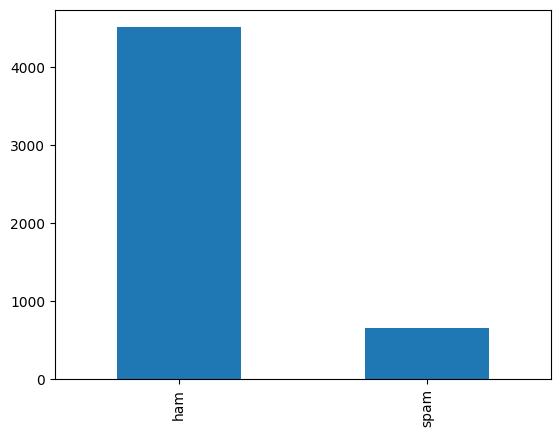

In [25]:
data['Category_Types'].value_counts().plot(kind ='bar')

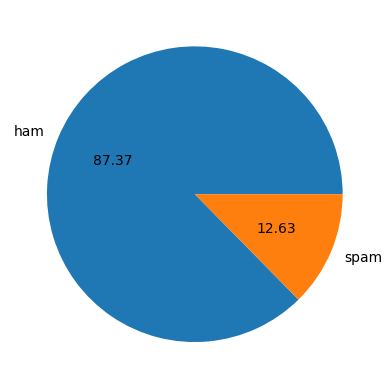

In [26]:
import matplotlib.pyplot as plt
plt.pie(data['Category_Types'].value_counts(),labels =['ham','spam'],autopct ='%0.2f')
plt.show()

In [27]:
# data is imbalanced

In [28]:
#convert to X and Y
X = data.SMS
Y = data.Spam
print(X.shape)
print(Y.shape)

(5169,)
(5169,)


In [29]:
#split the data into training and testing sets using the 'train_test_split' function from sklearn.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 1)

In [30]:
X_train.head()

1                           Ok lar... Joking wif u oni...
5362    I'm in inside office..still filling forms.don ...
3468    All day working day:)except saturday and sunday..
2865                        Smith waste da.i wanna gayle.
3781                     How r Ì_ going to send it to me?
Name: SMS, dtype: object

In [31]:
Y_train.head()

1       0
5362    0
3468    0
2865    0
3781    0
Name: Spam, dtype: int64

In [32]:
# Used the 'TfidfVectorizer' from sklearn to convert the text data into numerical vectors, considering the stop words in English.
# vectorizing the sentences,removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')


In [33]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [34]:
#printing the vocabulary
tfidf.vocabulary_

{'ok': 4508,
 'lar': 3691,
 'joking': 3534,
 'wif': 6878,
 'oni': 4527,
 'inside': 3389,
 'office': 4496,
 'filling': 2619,
 'forms': 2723,
 'don': 2235,
 'know': 3640,
 'leave': 3729,
 'day': 2027,
 'working': 6953,
 'saturday': 5439,
 'sunday': 6067,
 'smith': 5747,
 'waste': 6783,
 'da': 1988,
 'wanna': 6767,
 'gayle': 2849,
 'ì_': 7099,
 'going': 2924,
 'send': 5521,
 'freemsg': 2754,
 'hi': 3145,
 'baby': 1097,
 'wow': 6971,
 'just': 3562,
 'got': 2947,
 'new': 4372,
 'cam': 1496,
 'moby': 4182,
 'hot': 3222,
 'pic': 4758,
 'fancy': 2559,
 'chat': 1613,
 'im': 3315,
 'w8in': 6735,
 '4utxt': 495,
 'rply': 5354,
 '82242': 615,
 'hlp': 3167,
 '08712317606': 96,
 'msg150p': 4242,
 '2rcv': 385,
 'yup': 7080,
 'noe': 4411,
 'leh': 3741,
 'xy': 7022,
 'lunch': 3920,
 'good': 2934,
 'time': 6334,
 'nice': 4384,
 'bit': 1256,
 'different': 2153,
 'weekends': 6825,
 'change': 1594,
 'ya': 7024,
 'soon': 5803,
 'problem': 4977,
 'sch': 5456,
 'rem': 5206,
 'correctly': 1863,
 'blimey': 1280,

In [35]:
#vocab size
len(tfidf.vocabulary_.keys())

7110

In [36]:
# transforming the train and test datasets
X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

In [37]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 6878)	0.4368017329157393
  (0, 4527)	0.5290929480381518
  (0, 4508)	0.28135732783089035
  (0, 3691)	0.412508914897925
  (0, 3534)	0.5290929480381518
  (1, 4496)	0.34630073157977126
  (1, 3729)	0.31445144618484844
  (1, 3640)	0.2369250505998017
  (1, 3389)	0.4251985856084617
  (1, 2723)	0.4877236556198847
  (1, 2619)	0.4877236556198847
  (1, 2235)	0.2617633396638459
  (2, 6953)	0.419904970793644
  (2, 6067)	0.504934288678524
  (2, 5439)	0.4677385415465359
  (2, 2027)	0.5915588190293688
  (3, 6783)	0.46068783822965204
  (3, 6767)	0.38310948096450137
  (3, 5747)	0.5140354933133167
  (3, 2849)	0.5395644291776539
  (3, 1988)	0.29262874035666403
  (4, 7099)	0.6266510037666704
  (4, 5521)	0.5480575885963683
  (4, 2924)	0.5540229228652536
  (5, 6971)	0.20230705808532568
  :	:
  (3871, 2027)	0.198883029342835
  (3871, 1702)	0.3788357992135742
  (3871, 1672)	0.3333233151527864
  (3872, 6746)	0.3335841421800436
  (3872, 5521)	0.27289935130558607
  (387

# Building and Evaluating the model 

# 1. LogisticRegression

In [38]:
# Step 1: Vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Train and evaluate the Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_tfidf, Y_train)

# Step 3: Make predictions and evaluate the model
Y_pred_logreg = logreg_classifier.predict(X_test_tfidf)

# Now you can evaluate the performance of the classifier using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

report_logreg = classification_report(Y_test, Y_pred_logreg)
print("Logistic Regression Classification Report:\n", report_logreg)

Logistic Regression Accuracy: 0.9443155452436195
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1128
           1       0.96      0.59      0.73       165

    accuracy                           0.94      1293
   macro avg       0.95      0.79      0.85      1293
weighted avg       0.95      0.94      0.94      1293



# 2. Support Vector Machine (SVM)

In [39]:
# Step 1: Vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Train and evaluate the SVM model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, Y_train)

# Step 3: Make predictions and evaluate the model
Y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Now you can evaluate the performance of the classifier using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)

SVM Accuracy: 0.9767981438515081
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1128
           1       0.96      0.85      0.90       165

    accuracy                           0.98      1293
   macro avg       0.97      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293



# 3.Naive Bayes model

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Train and evaluate Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, Y_train)

# Step 3: Make predictions and evaluate the Naive Bayes model
Y_pred_nb = naive_bayes_classifier.predict(X_test_tfidf)

# Now you can evaluate the performance of the Naive Bayes classifier using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

report_nb = classification_report(Y_test, Y_pred_nb)
print("Naive Bayes Classification Report:\n", report_nb)

Naive Bayes Accuracy: 0.9574632637277649
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1128
           1       1.00      0.67      0.80       165

    accuracy                           0.96      1293
   macro avg       0.98      0.83      0.89      1293
weighted avg       0.96      0.96      0.95      1293



Based on the provided classification reports and accuracy scores, the Support Vector Machine (SVM) appears to be the best-fit model among the three algorithms (Logistic Regression, SVM, and Naive Bayes) for dataset.

SVM Accuracy: 0.9767981438515081

The SVM model shows consistent high performance across accuracy, F1-score, precision, and recall for both classes. This indicates that it is a robust model for your dataset and can effectively distinguish between the two classes (0 and 1) with high accuracy.

In [43]:
import pickle


In [44]:
pickle.dump(svm_classifier,open('model.pkl','wb'))
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))